In [2]:
#Always starte here for random workflows
import os
%run -i "C:\Users\Mahdi Ashraf\Desktop\JupyterNotebooks\imports"

# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Text(0.5, 1.0, 'Distribution of observed charges')

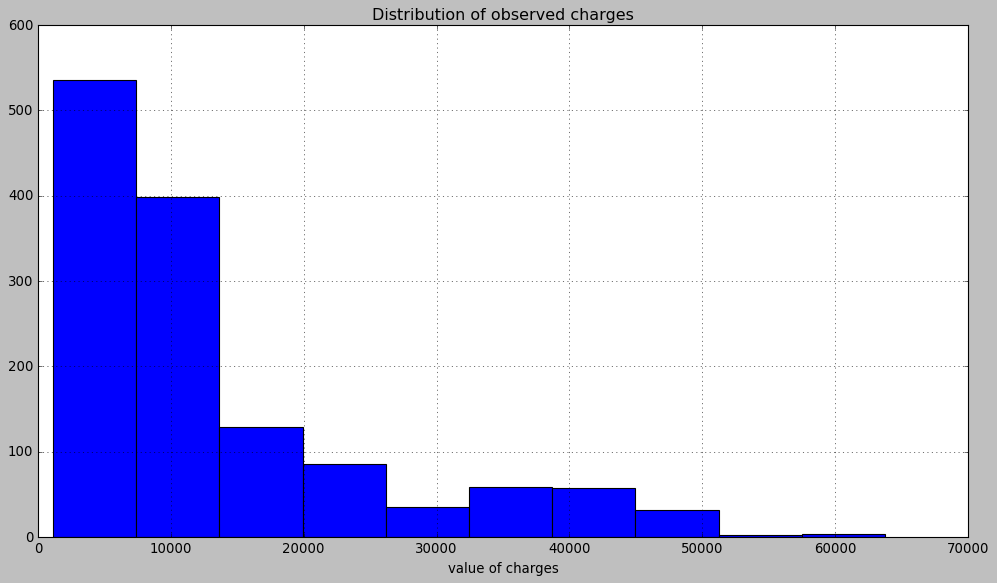

In [315]:
medical.charges.hist(figsize=(15,8))
plt.xlabel('value of charges')
plt.title('Distribution of observed charges')

In [8]:
mean_charges = np.mean(medical.charges.values)
std = np.std(medical.charges.values, ddof=1)
print(int(mean_charges), int(std))

13270 12110


Text(0.5, 1.0, 'Distribution of observed charges in log-scale')

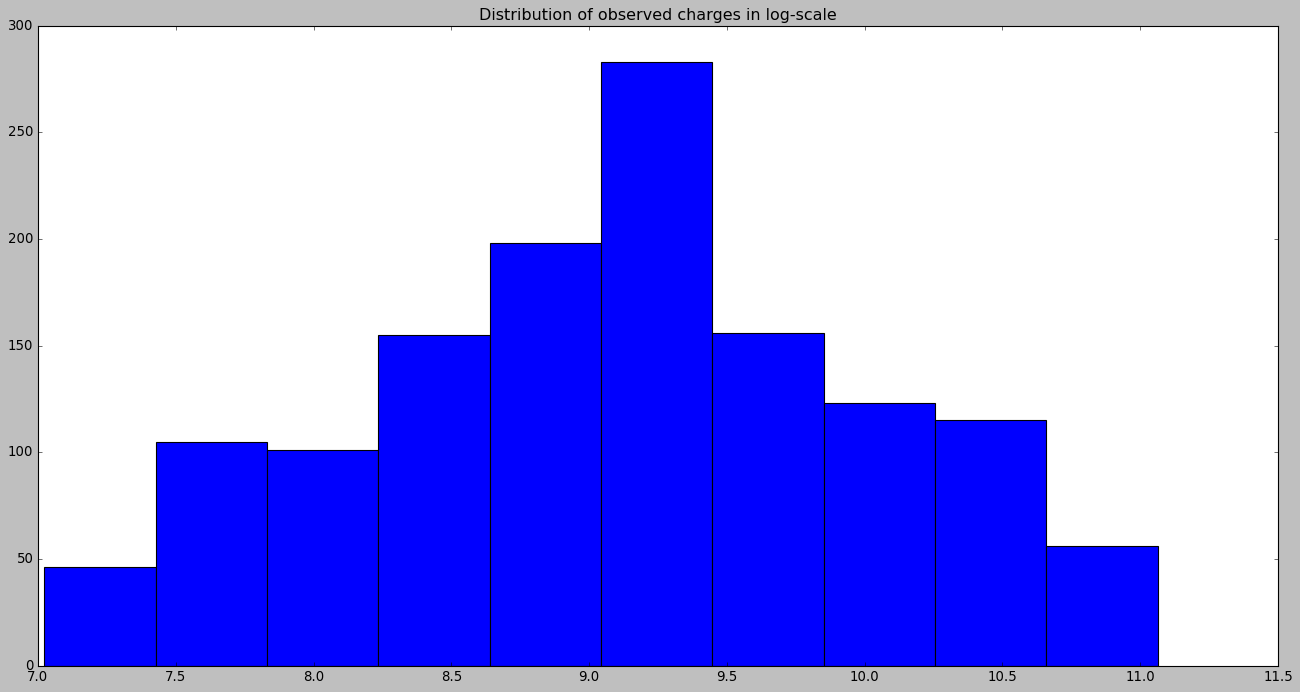

In [316]:
plt.hist(np.log(medical.charges.values))
plt.title('Distribution of observed charges in log-scale')

__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: Histogram shows charges is not normally distributed therefore the mean is not such a good aggregate statistical measure, which is also evident from the std which is nearly as large as the mean. This is also confirmed by the plot where I show the histogram of the logarithm of charge and the apparent normal-like distribution. In other words, the mean of the distribution alone poorly explains the observed variation in the data.

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: A t-statistic test is the only appropriate test because we do not have the true variance of population, rather we are inferring an estimate of the true variance from the sample observed. If we assume a normal distribution about the mean charges then we can compute the t-test with the mean observed from the sample to gauge how significant it is under the null-hypothesis that the true mean is normally distributed about 12000. 

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A: The null hypothesis is that the mean of the distribution of charges is atleast equal to 12000. The alternate hypothesis is that the distribution of charges is not equal to 12000 but lesser. Since we are concerned with charges falling below the threshold of 12000, a one-sided interval is appropriate since charges above 12000 are not of concern. Critical value -1.64. The probability of the mean of the charges as observed from the samples a 0.00327% chance of occurring under the null-hypothesis thus the results are significant and we reject the null in favor of the alternate that indeed the mean charges have dropped below 12000.

In [285]:
mean_null = 12000
t = (mean_charges - mean_null)/ (std/np.sqrt(len(medical)))
t = t/2 #One sided confidence interval
t

1.9186758598292661

In [289]:
c_val = scipy.stats.norm(loc=t/(len(medical)-1)).ppf(0.05)
c_val

-1.6434185664729168

(array([  9.,  32.,  87., 174., 247., 235., 133.,  64.,  16.,   3.]),
 array([-3.06716573, -2.43361948, -1.80007324, -1.166527  , -0.53298076,
         0.10056548,  0.73411173,  1.36765797,  2.00120421,  2.63475045,
         3.26829669]),
 <a list of 10 Patch objects>)

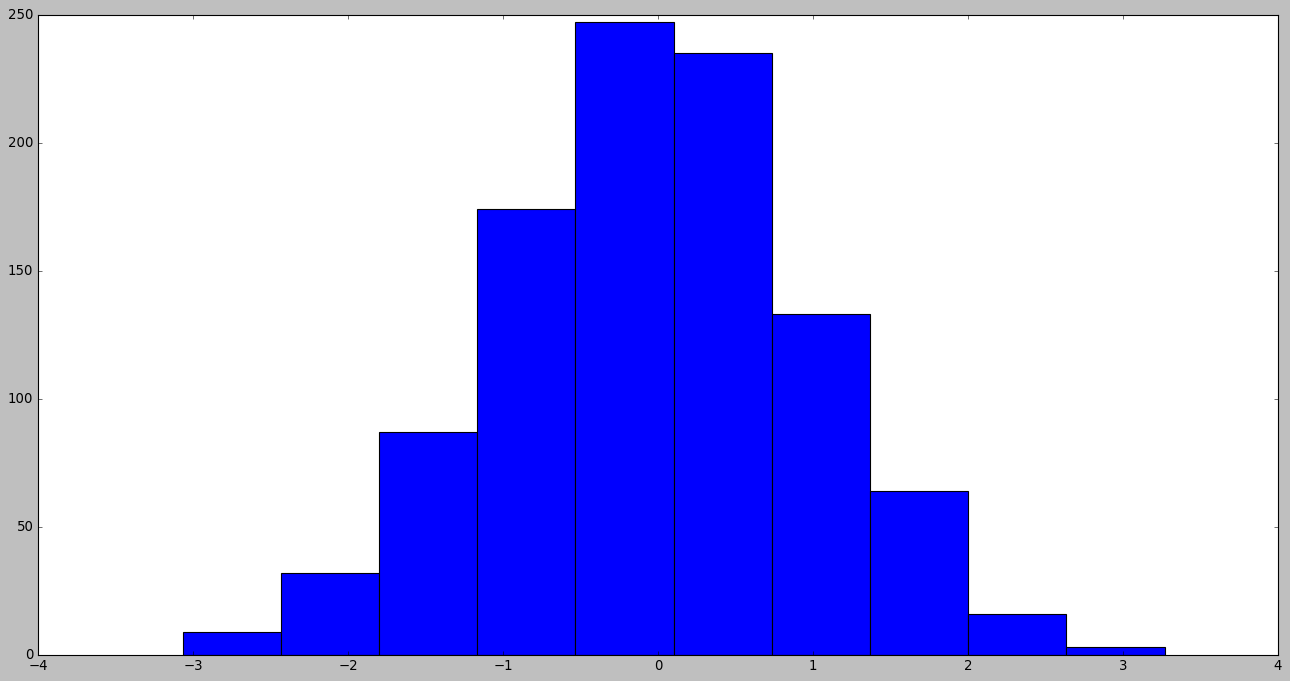

In [293]:
plt.hist(scipy.stats.norm(loc=t/(len(medical)-1)).rvs(1000))

In [313]:
scipy.stats.norm(loc=mean_null, scale=std).pdf(mean_charges)*100

0.0032762400913292347

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A: Null Hypothesis: The difference in the mean distribution of charges for insured and non-insured is zero. Alternative Hypothesis: The difference in the mean distribution of charges for insured and non-insured is non-zero. The variances between the two groups are assumed to be normally distributed with mean zero.


__A: t-statistic is 11.89 and p-value << 0.05 and therefore is significant thus the null hypothesis that the differences in the mean charges over the two groups is zero is rejected in favor of the alternate that the mean charges for the groups are not the same. The adiministrator intuition was correct and two groups are being charged different amounts. Results concurr with scipy stats.

In [218]:
ins = medical.query('insuranceclaim==1')
no_ins = medical.query('insuranceclaim==0')

n0 = len(ins)
n1 = len(no_ins)
print(n0, n1)

v0  = ins.charges.values
v1  = no_ins.charges.values

x0  = np.mean(v0)
x1  = np.mean(v1)

s0  = np.std(v0, ddof=1)
s1  = np.std(v1, ddof=1)

In [207]:
print(x0, x1)
print(s0, s1)

16052.44631316433 8893.439268236472
13966.59624683422 6514.258614485623


In [219]:
sp = np.sqrt( ((n0-1)*(s0**2) + (n1-1)*(s1**2)) / (n0+n1-2)) 
sp 

11520.034268775262

In [229]:
t  = (x0-x1)/ ( np.sqrt( (1/n0)+ (1/n1) ) *sp)
t

11.89329903087671

In [273]:
p_value = scipy.stats.norm(loc=t/(len(medical)-1)).pdf(11.93)
p_value

5.514705939311307e-32

In [274]:
scipy.stats.ttest_ind(v0,v1)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A: set equal_var to False to account for unequal sample variances.

In [275]:
scipy.stats.ttest_ind(v0,v1, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: The z-test can only be performed under the following assumptions, the true variance of the population is known which is rarely true, most likely we have an estimate of the true variance from a sample of the population. Additionally, sample size needs to be greater than 30.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test